# Province project

**Summary:** Data analysis of CEIPAC [database](http://www.romanopendata.eu/). 

**Date:** June 2018

**Author: ** Iza Romanowska

**Objective: ** Check whether distribution of stamps along the northern Limes differ between civil and military settlements.


In [135]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

## Data input
Data overview.

In [92]:
dataO = pd.read_excel('data.xls', sheetname = 'obj')
dataS = pd.read_excel('data.xls', sheetname = 'sellos')
dataF = pd.read_excel('data.xls', sheetname = 'familia')

In [93]:
data = dataO.merge(dataS, left_on = 'ID Number', right_on = 'ID Number')
data = data.merge(dataF, left_on = 'ID Number', right_on = 'ID Number')

In [130]:
data.head()

,ID Number,Tipología Anf.,Tipo de Provincia,Rango Provincia,Provincia,Pais Moderno,GIS LH,Tipo de Asentamiento,Datación Pecios,LH,...,CONS. Sello,LP1,GIS LP1,Conventus LP1,Datación (inferida),Bibliografia (Dat. Inf.),Sello índice,Conservación Sello,FAMILIAS,FIGLINAS
0,36094,DR20+BAE,Imperial,Rango ecuestre,Mauretania Tingitana,MA,-45265,Asentamiento militar,NaN,Sidi Ali ben ahmed (Thamusida),...,AQFVA,NaN,NaN,NaN,NaN,NaN,AQFVA,|AQFV~A|,AQFVA,NaN
1,36095,DR20+BAE,Imperial,Rango ecuestre,Mauretania Tingitana,MA,-45265,Asentamiento militar,NaN,Sidi Ali ben ahmed (Thamusida),...,CVP,Madueño,"37.687599,-5.274237",Astigi,\N,\N,CVP,|C·V·P|,CVP,NaN
2,36101,DR20+BAE,Imperial,Rango ecuestre,Mauretania Tingitana,MA,-45265,Asentamiento militar,NaN,Sidi Ali ben ahmed (Thamusida),...,LV...,NaN,NaN,NaN,NaN,NaN,LV...,|L·V·+|,NaN,NaN
3,36104,DR20+BAE,Imperial,Rango ecuestre,Mauretania Tingitana,MA,-45265,Asentamiento militar,NaN,Sidi Ali ben ahmed (Thamusida),...,MIM,"La Catria, Peñaflor","37.648779,-5.506146 // 37.70557,-5.348518",Hispalis,\N,\N,MIM,M·I·M|,MIM,NaN
4,36105,DR20+BAE,Imperial,Rango ecuestre,Mauretania Tingitana,MA,-45265,Asentamiento militar,NaN,Sidi Ali ben ahmed (Thamusida),...,MIN...,NaN,NaN,NaN,NaN,NaN,MIN...,|MIN+,MIM,NaN


Use the field 'Familias'. 
Remove any values that appear less than 20 times. 

In [173]:
value_counts = data['FAMILIAS'].value_counts()
to_remove = value_counts[value_counts <= 20].index
data_small = data[~data.FAMILIAS.isin(to_remove)]


## Distibution of civilian and military settlements ALL PROVINCES

Remove provinces where less than 25 sellos have been found. Also remove provinces where there is only one type of settlement (usually only civilian).

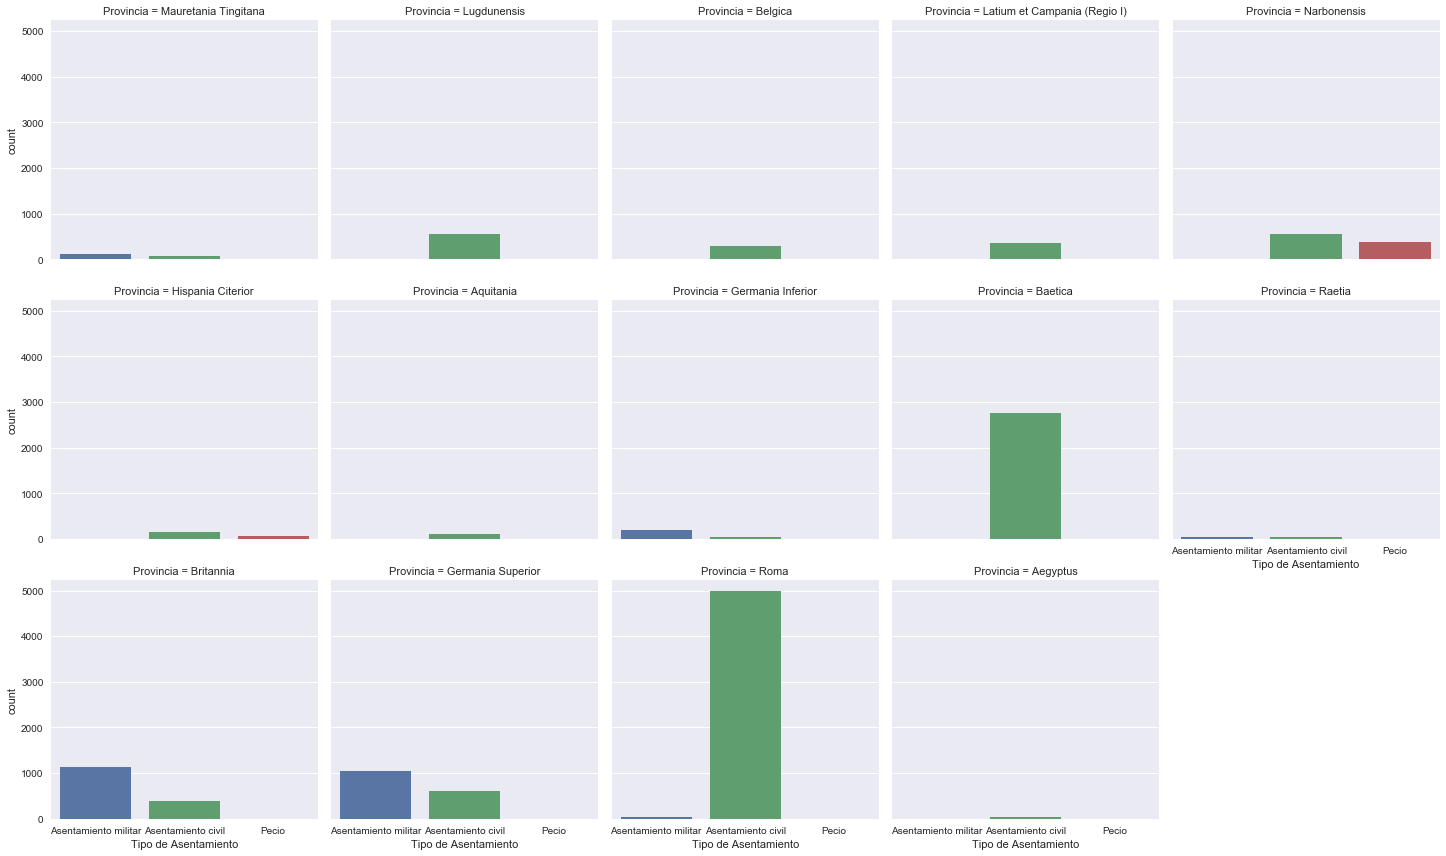

In [156]:
value_counts = data['Provincia'].value_counts()
to_remove = value_counts[value_counts <= 25].index
data_small_p = data_small[~data_small.Provincia.isin(to_remove)]
data_small_p.groupby('Provincia')['Tipo de Asentamiento'].value_counts()
sns.factorplot(x = 'Tipo de Asentamiento', kind = 'count', data=data_small_p, col = 'Provincia', col_wrap=5)


In [ ]:
both = [ 'Roma', 'Mauretania Tingitana', 'Hispania Citerior', 'Narbonensis', 'Raetia' ]
data_both = data_small_p[data_small_p.Provincia.isin(both)]

### Distribution of sellos among military and civilian camps

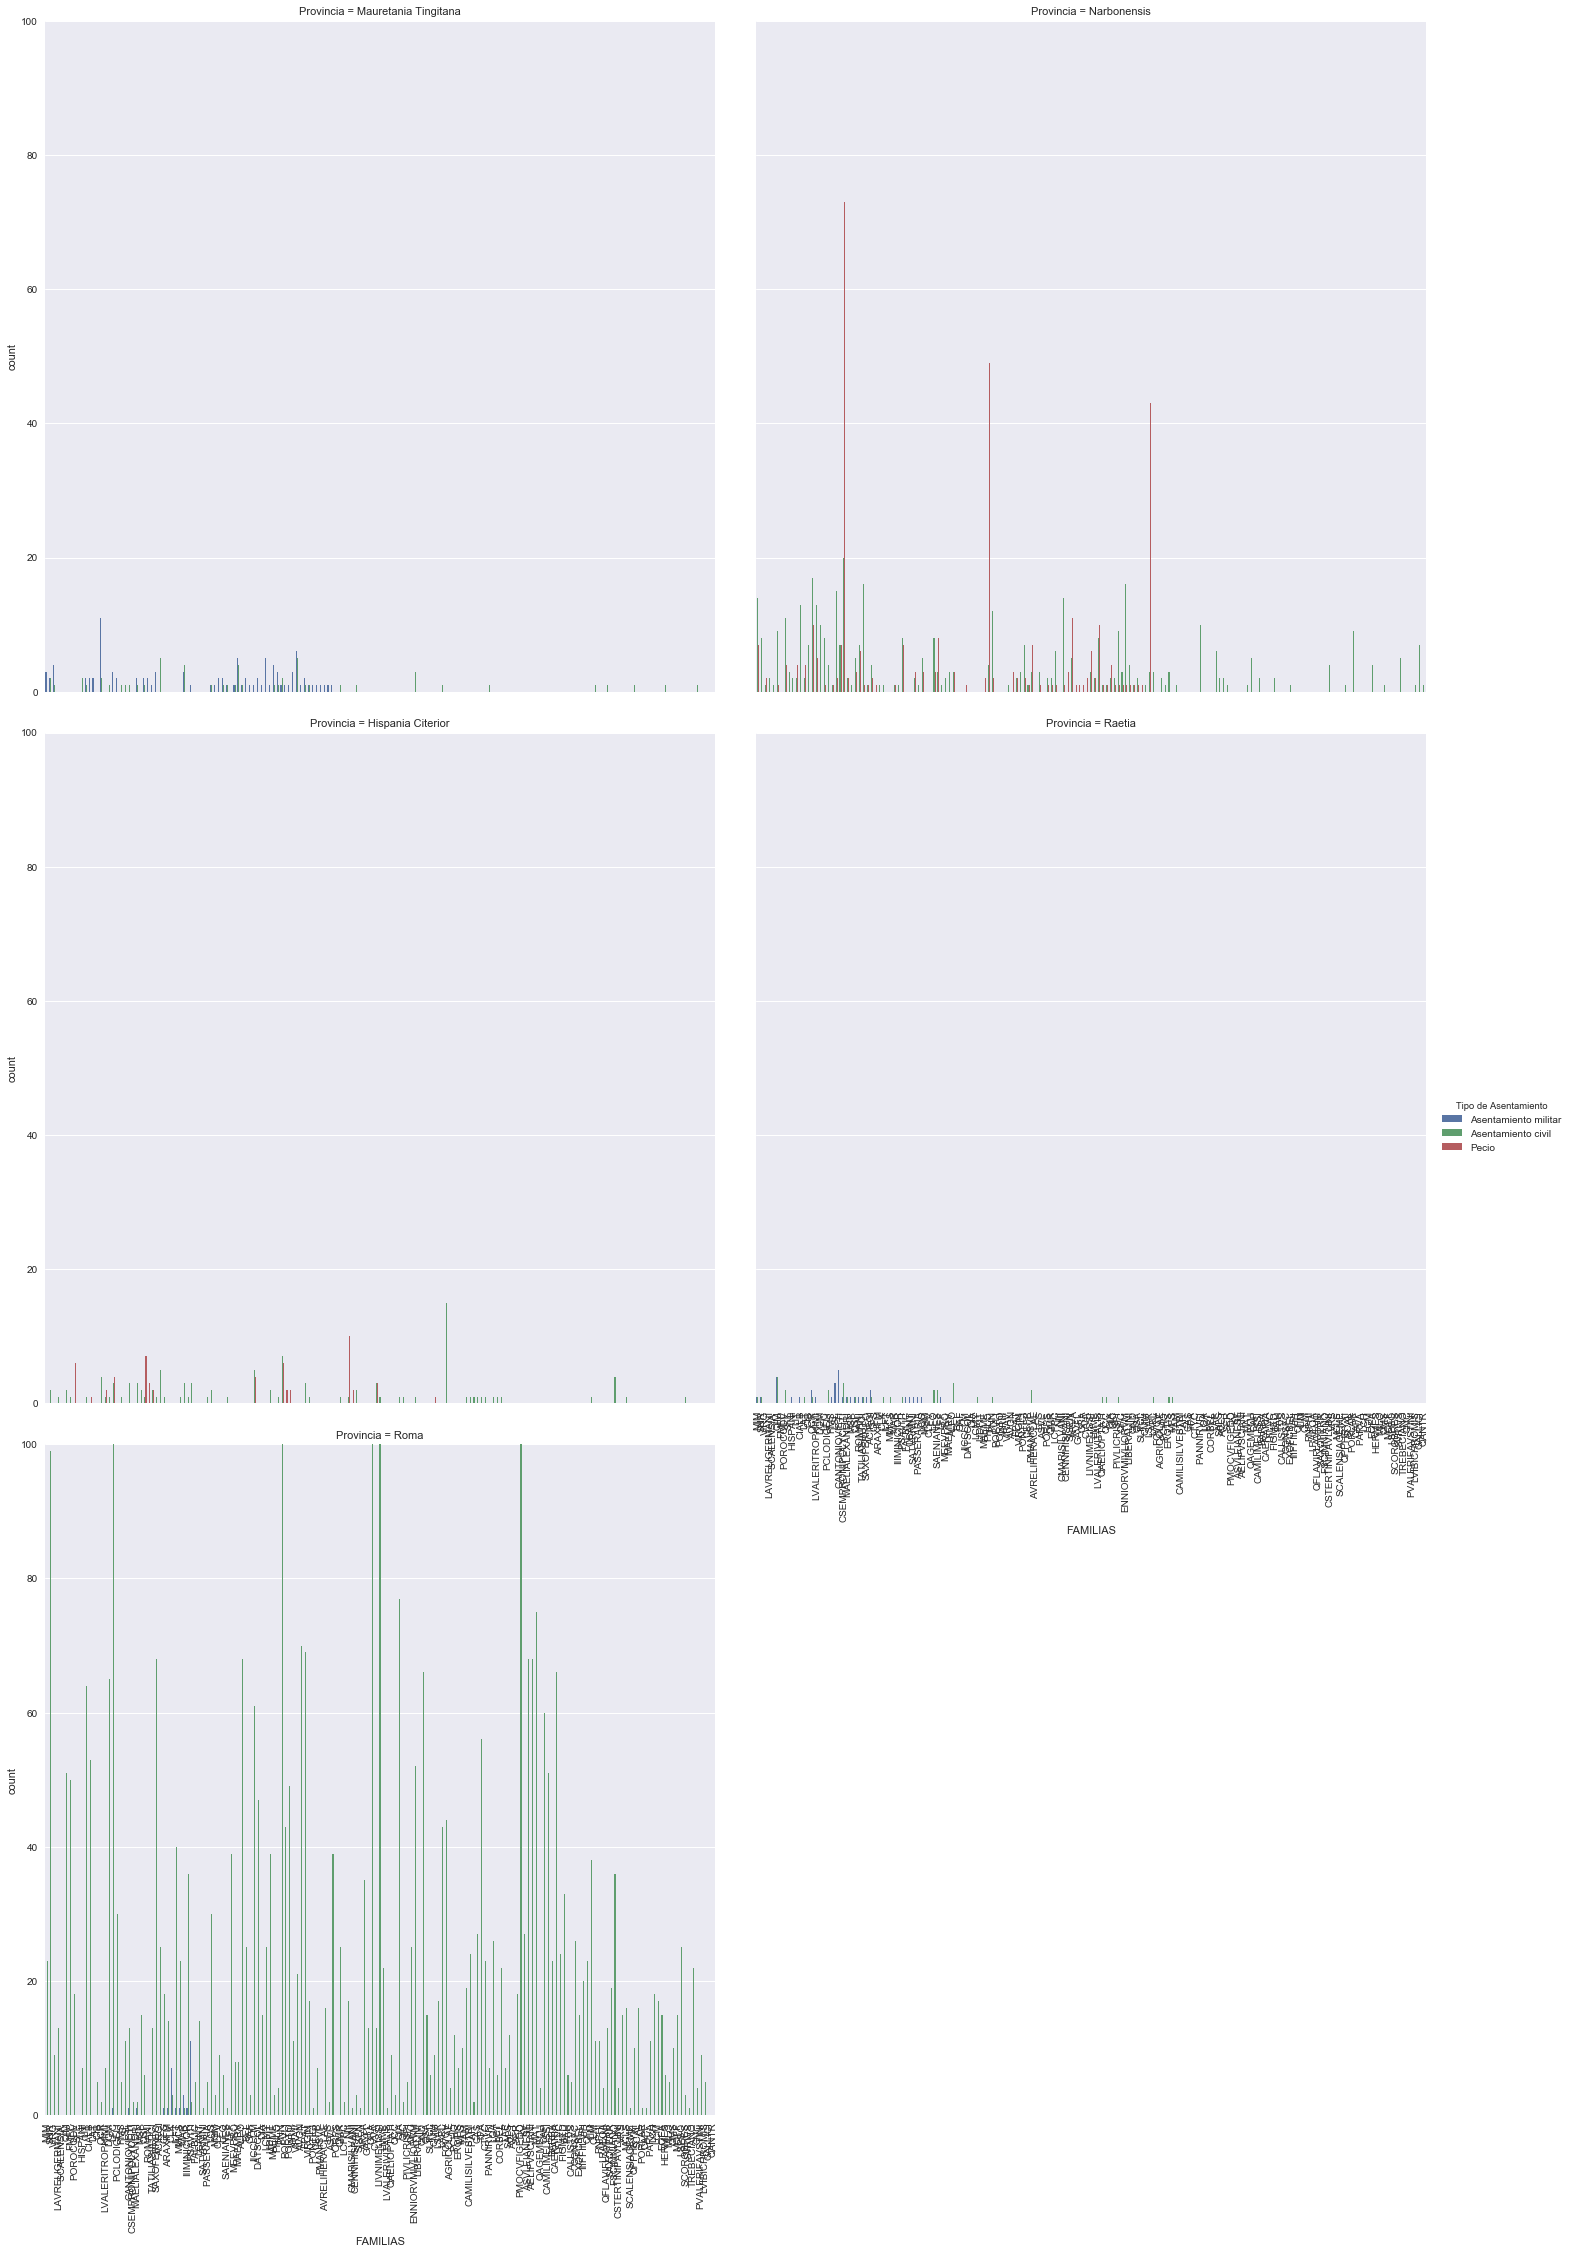

In [161]:
#fig = plt.figure(figsize=(45,45))
g=sns.factorplot(x = 'FAMILIAS', 
                 kind = 'count', 
                 data = data_both, 
                 col = 'Provincia',
                 hue = 'Tipo de Asentamiento',
                 col_wrap=2,
                size = 10)
sns.plt.ylim(0, 100)

g.set_xticklabels(rotation=90)

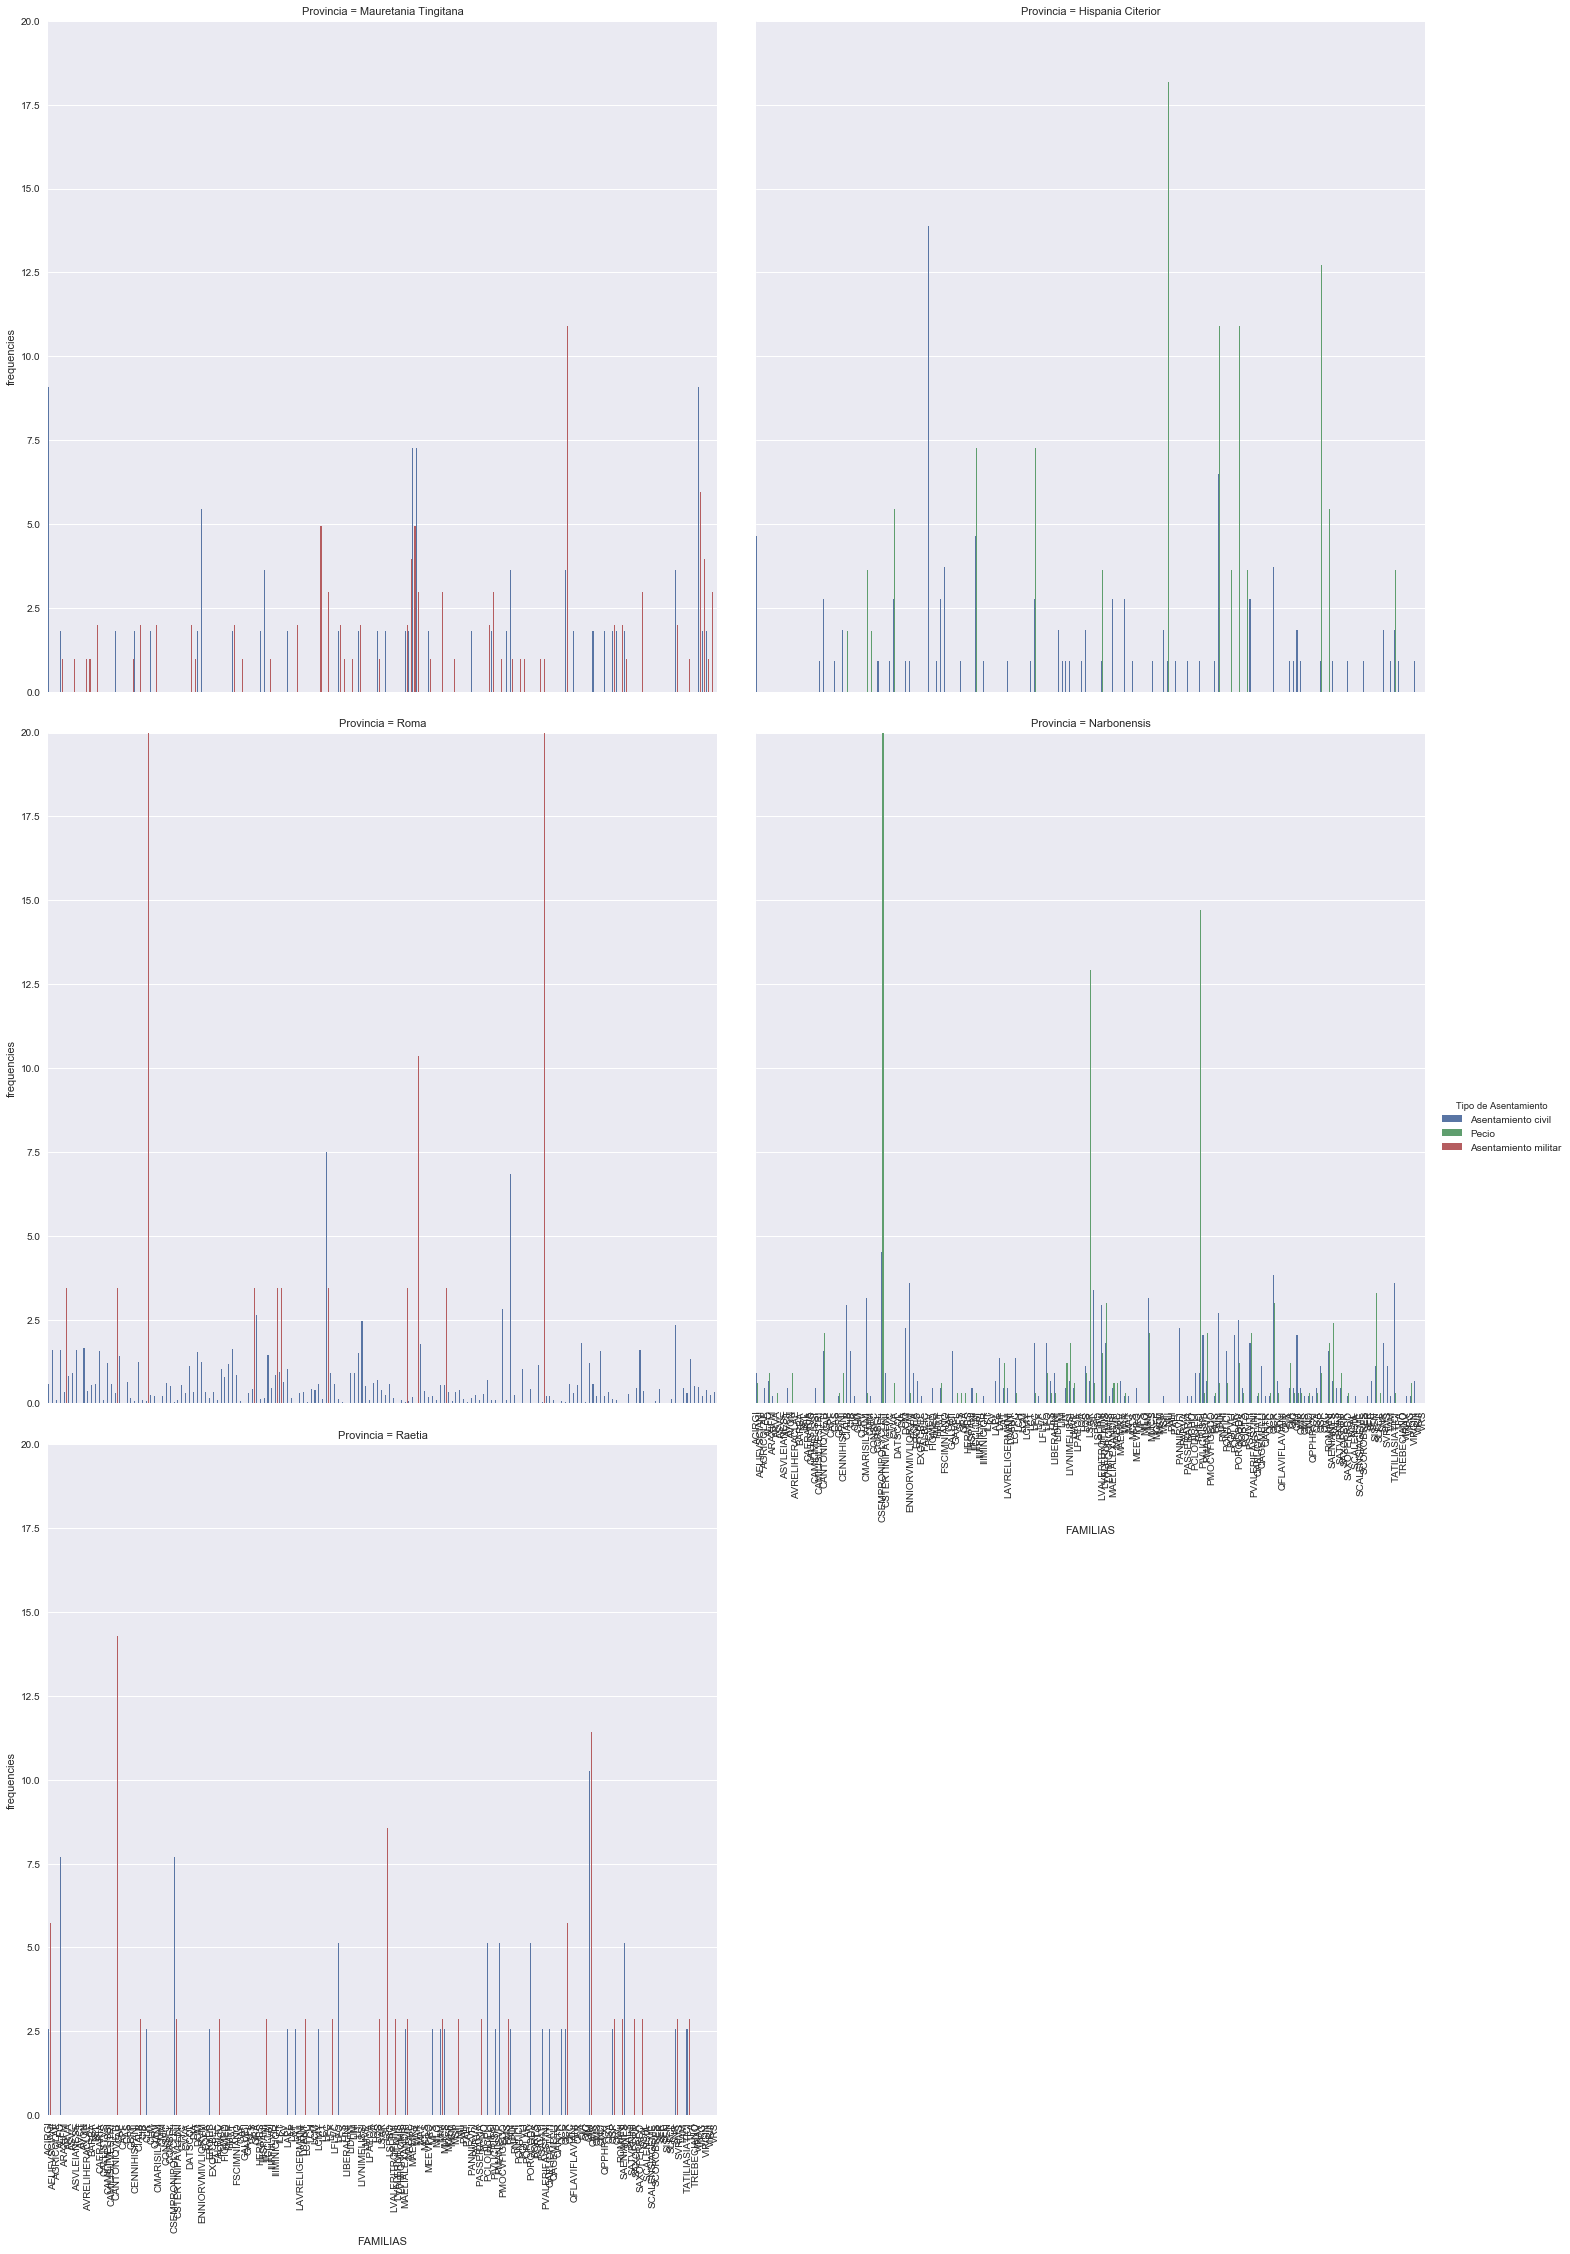

In [162]:
data_freq = (data_both.groupby(['Provincia', 'Tipo de Asentamiento'])['FAMILIAS']
                     .value_counts(normalize=True)
                     .rename('frequencies')
                     .mul(100)
                     .reset_index()
                     .sort_values('FAMILIAS'))

g=sns.factorplot(x="FAMILIAS", 
                y="frequencies", 
                hue="Tipo de Asentamiento", 
               kind = 'bar',
                data=data_freq, 
               col = 'Provincia', 
               col_wrap=2,
                size = 10)
sns.plt.ylim(0, 20)

g.set_xticklabels(rotation=90)

## Distibution of civilian and military settlements NORTHERN PROVINCES

Specify the provinces associated with the northern Limes: Belgica, Germania Superior and Inferior and Britannia. 

In [163]:
the_north = ['Belgica', 'Germania Superior', 'Germania Inferior', 'Britannia']
data_n = data[data.Provincia.isin(the_north)]
data_n_small = data_small[data_small.Provincia.isin(the_north)]

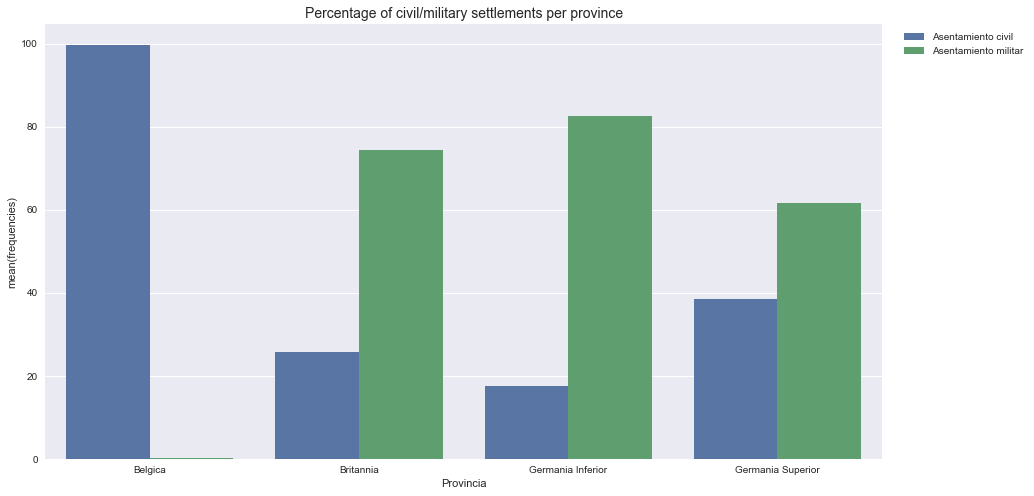

In [164]:
data_freq = (data_n.groupby(['Provincia'])['Tipo de Asentamiento']
                     .value_counts(normalize=True)
                     .rename('frequencies')
                     .mul(100)
                     .reset_index()
                     .sort_values('Tipo de Asentamiento'))
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Provincia", 
                y="frequencies", 
                hue="Tipo de Asentamiento", 
                data=data_freq)
plt.legend(loc='upper right', bbox_to_anchor=(1.18, 1.0))

plt.title('Percentage of civil/military settlements per province', size = 14)

In [165]:
display(data_n.groupby('Provincia')['Tipo de Asentamiento'].value_counts())

Provincia          Tipo de Asentamiento
Belgica            Asentamiento civil       373
                   Asentamiento militar       1
Britannia          Asentamiento militar    1480
                   Asentamiento civil       510
Germania Inferior  Asentamiento militar     298
                   Asentamiento civil        63
Germania Superior  Asentamiento militar    1398
                   Asentamiento civil       876
Name: Tipo de Asentamiento, dtype: int64

Proportion of civilian and miliatary sites in each province. Note that Belgica has virtually no military camps and that together with Germania Inferior they are much smaller than the other two.

### Distribution of sellos among military and civilian camps

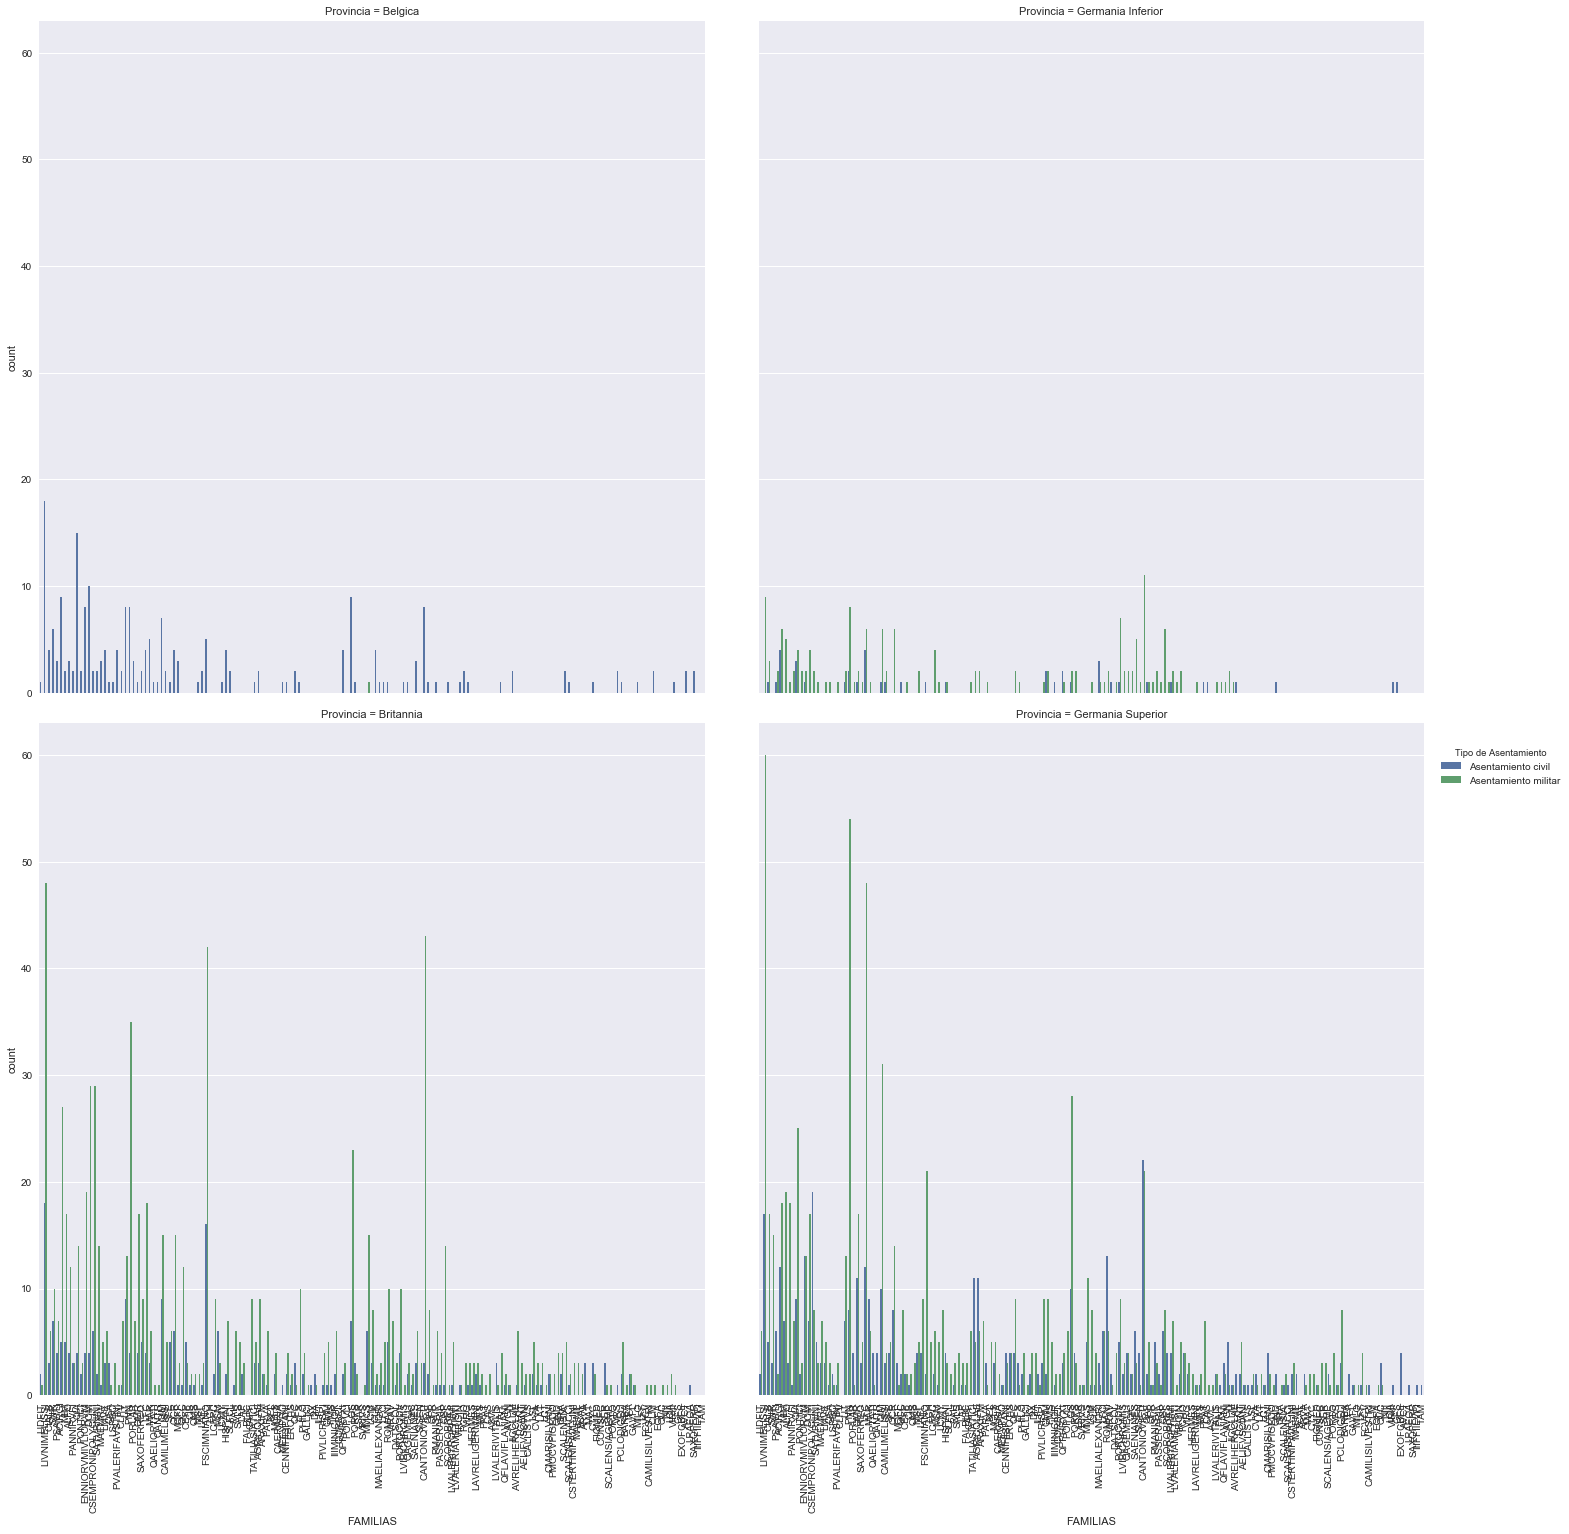

In [166]:
#fig = plt.figure(figsize=(45,45))
g=sns.factorplot(x = 'FAMILIAS', 
                 kind = 'count', 
                 data = data_small[data_small.Provincia.isin(the_north)], 
                 col = 'Provincia',
                 hue = 'Tipo de Asentamiento',
                 col_wrap=2,
                size = 10)
#sns.countplot(x='FAMILIAS', data = data_small)
g.set_xticklabels(rotation=90)

### Distribution of sellos among military and civilian camps - in frequencies

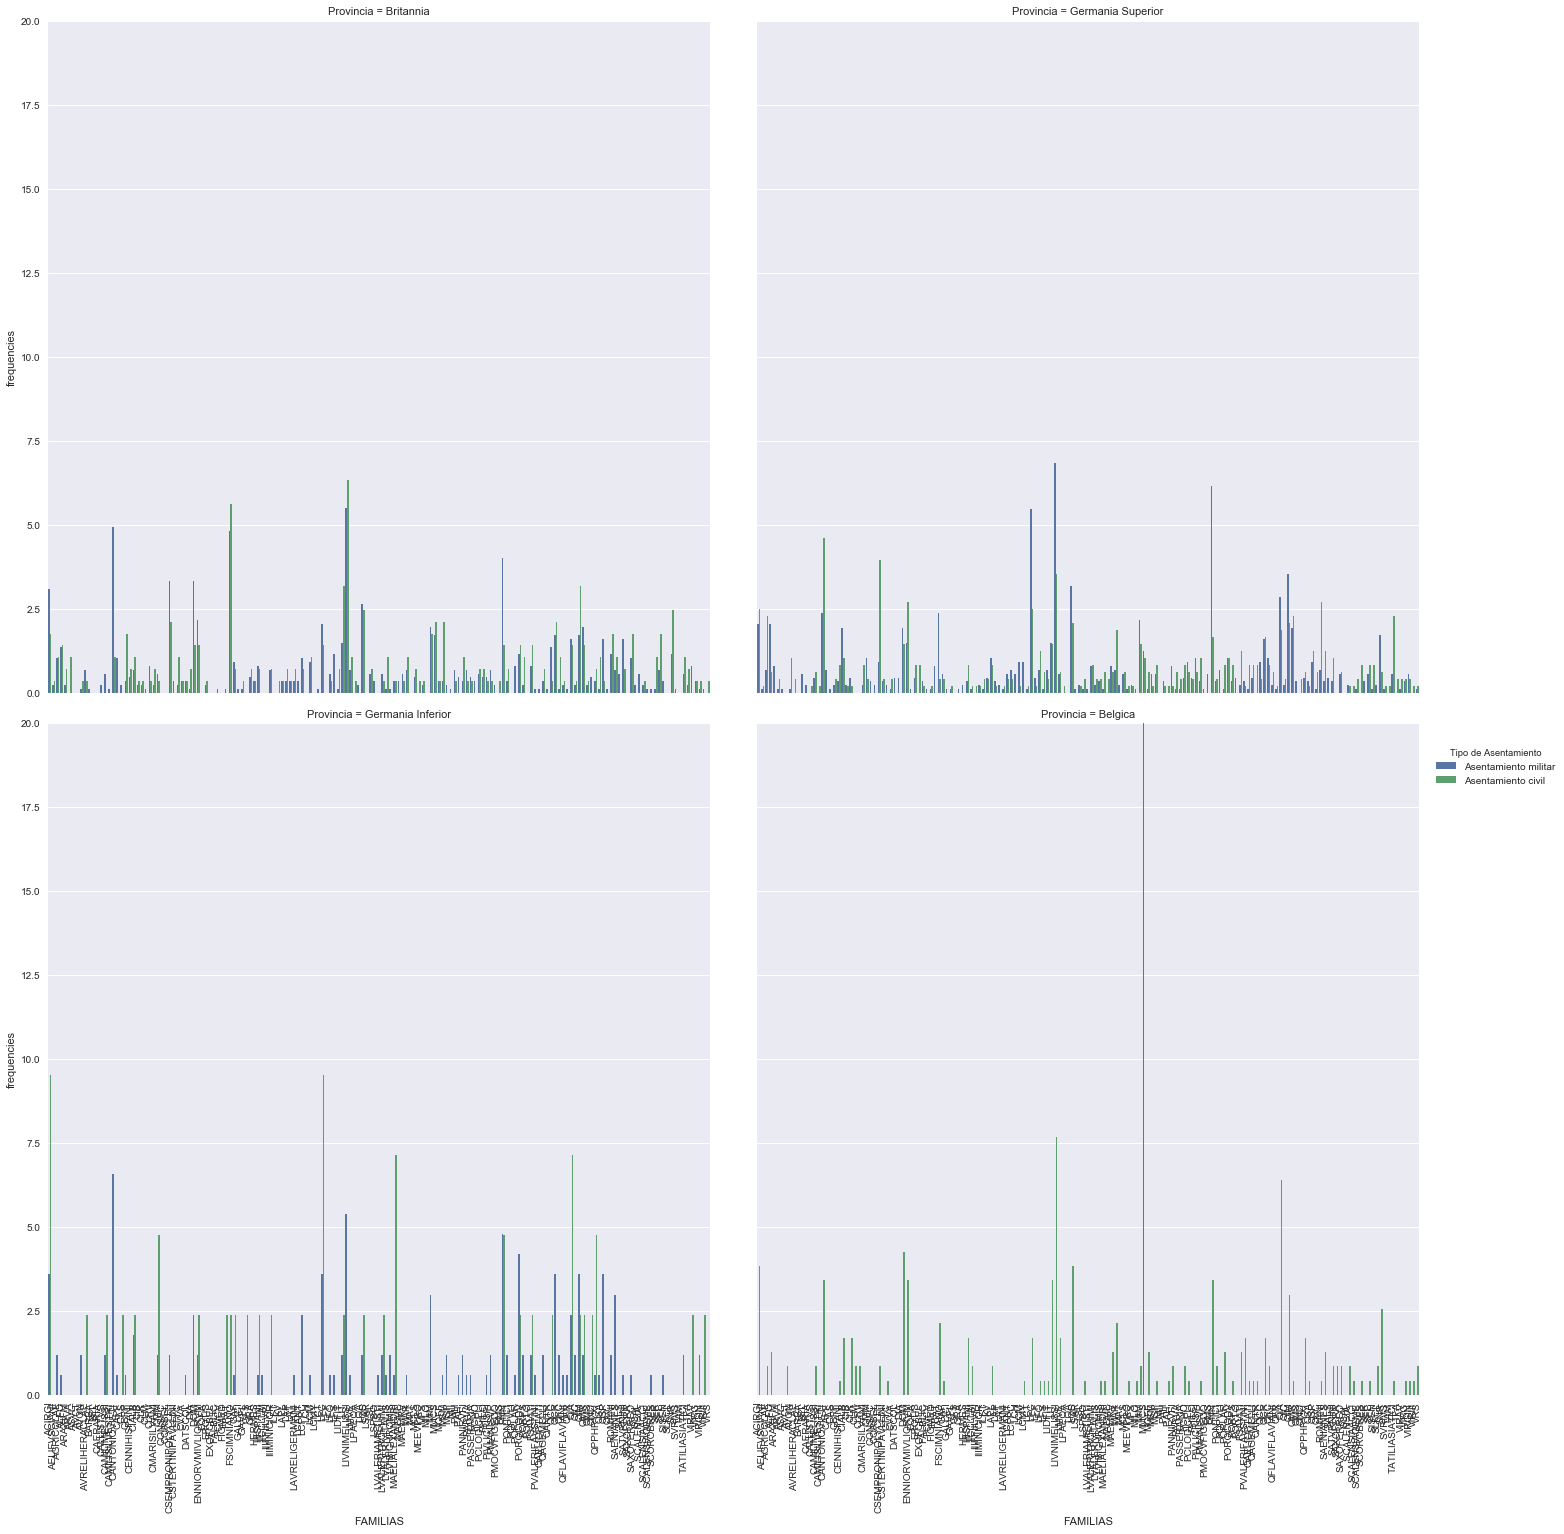

In [167]:
data_freq = (data_n_small.groupby(['Provincia', 'Tipo de Asentamiento'])['FAMILIAS']
                     .value_counts(normalize=True)
                     .rename('frequencies')
                     .mul(100)
                     .reset_index()
                     .sort_values('FAMILIAS'))

g=sns.factorplot(x="FAMILIAS", 
                y="frequencies", 
                hue="Tipo de Asentamiento", 
               kind = 'bar',
                data=data_freq, 
               col = 'Provincia', 
               col_wrap=2,
                size = 10)
sns.plt.ylim(0, 20)

g.set_xticklabels(rotation=90)


#### There doesn't seem to be any division between military or civil stamps

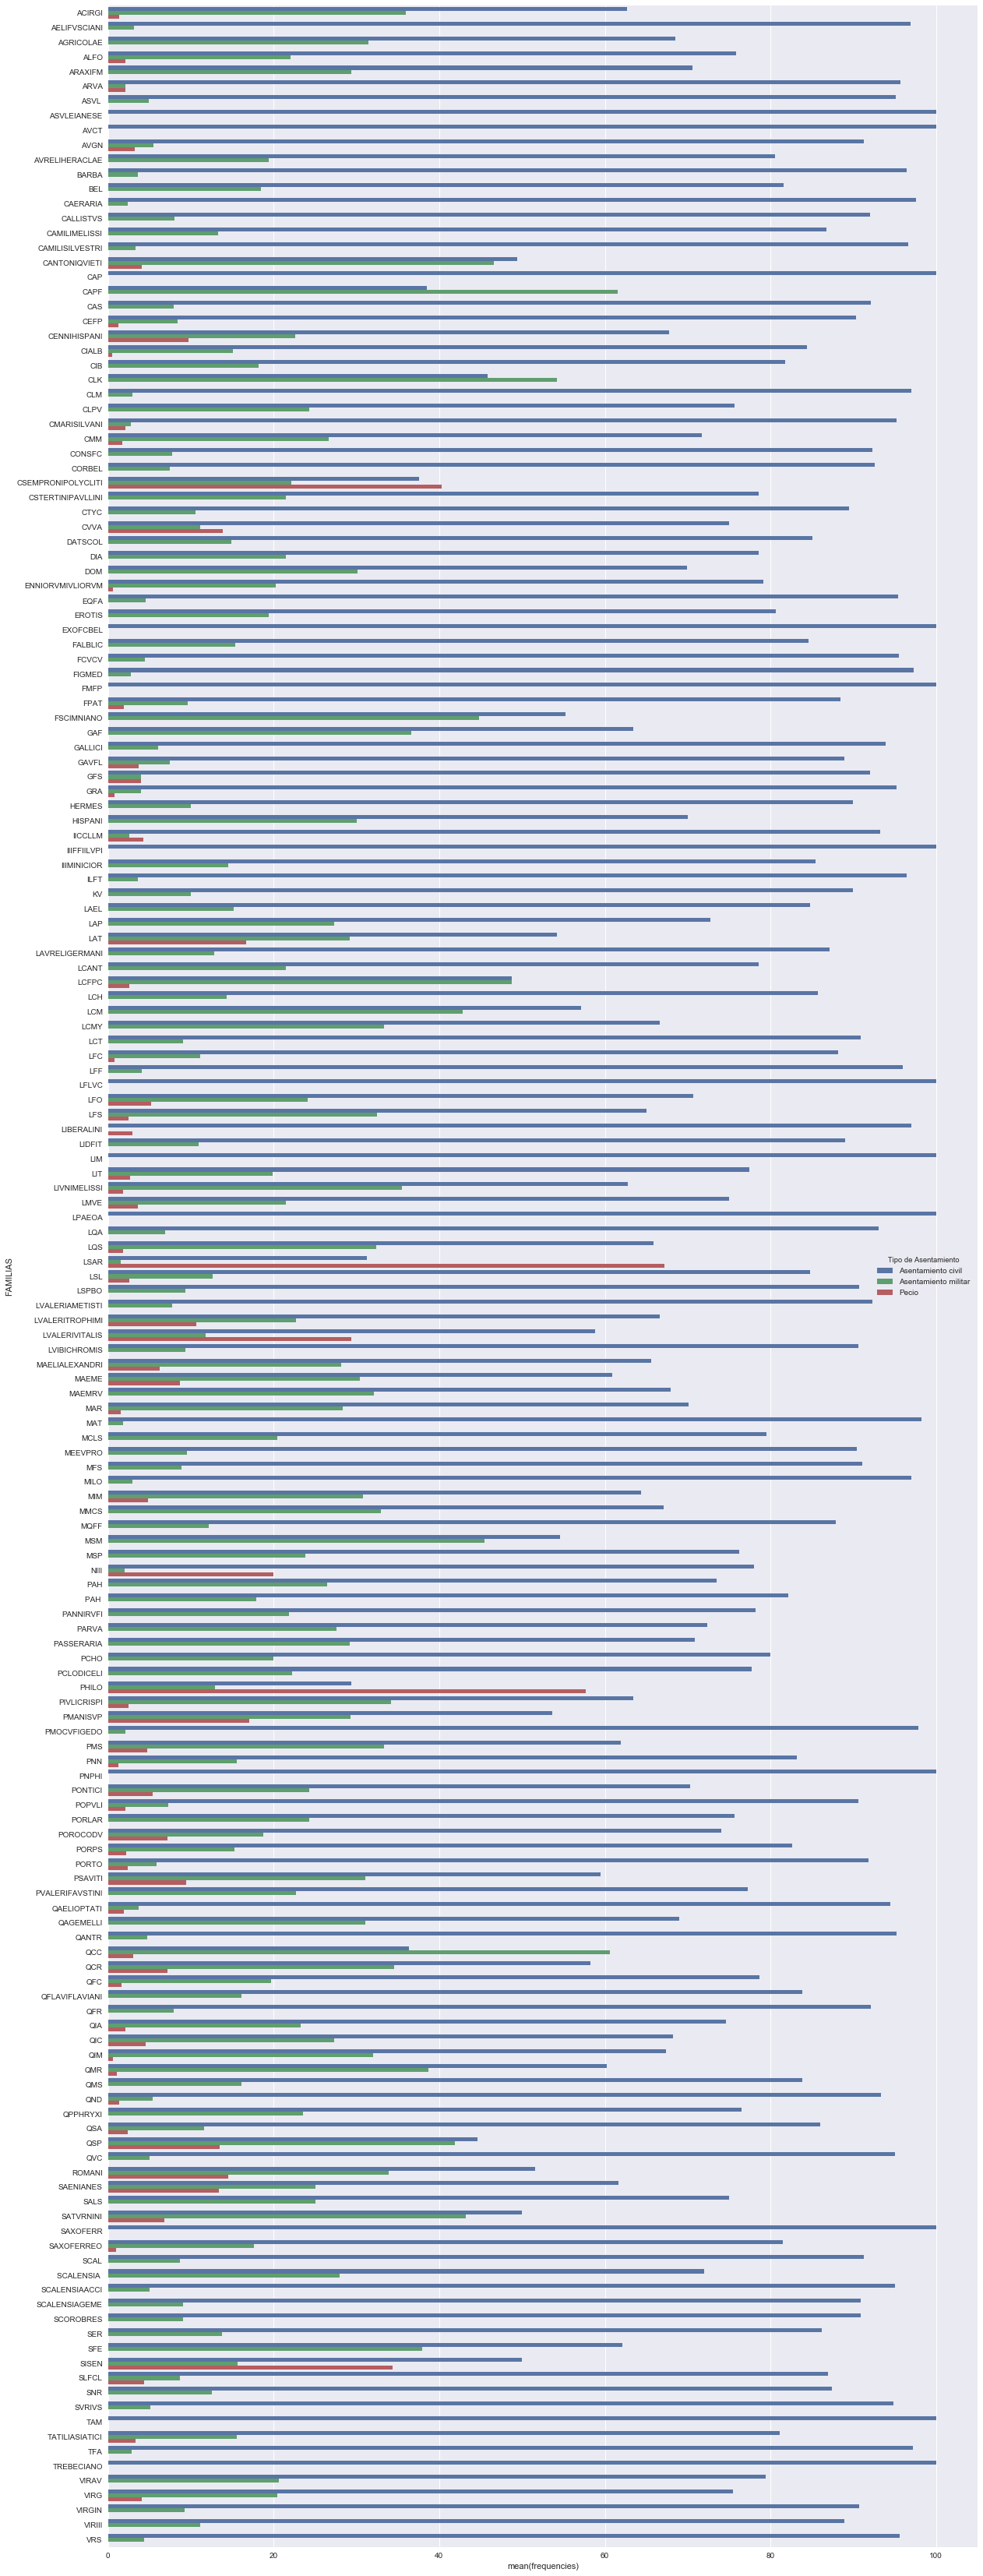

In [236]:
fig = plt.figure(figsize=(20,60))


data_freq = (data_small.groupby(['FAMILIAS'])['Tipo de Asentamiento']
                     .value_counts(normalize=True)
                     .rename('frequencies')
                     .mul(100)
                     .reset_index()
                     .sort_values('FAMILIAS'))
data_freq.head()

sns.barplot(y = 'FAMILIAS', x = 'frequencies', hue = 'Tipo de Asentamiento', data = data_freq, ci = None )


#### There is also no particular distinction between military camps in the northern limes and the rest of the empire

In [224]:
from itertools import cycle
a = dict(zip(the_north, cycle('N')))
dict(a) 
b = dict(zip(both, cycle('S')))
dict(b)
ns = {**a, **b}

In [225]:
data_mil = data_small[data_small['Tipo de Asentamiento']=='Asentamiento militar']
data_mil['NS'] = data_mil.Provincia.map(ns)


C:\Users\iromanow\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.]),
 <a list of 8 Text xticklabel objects>)

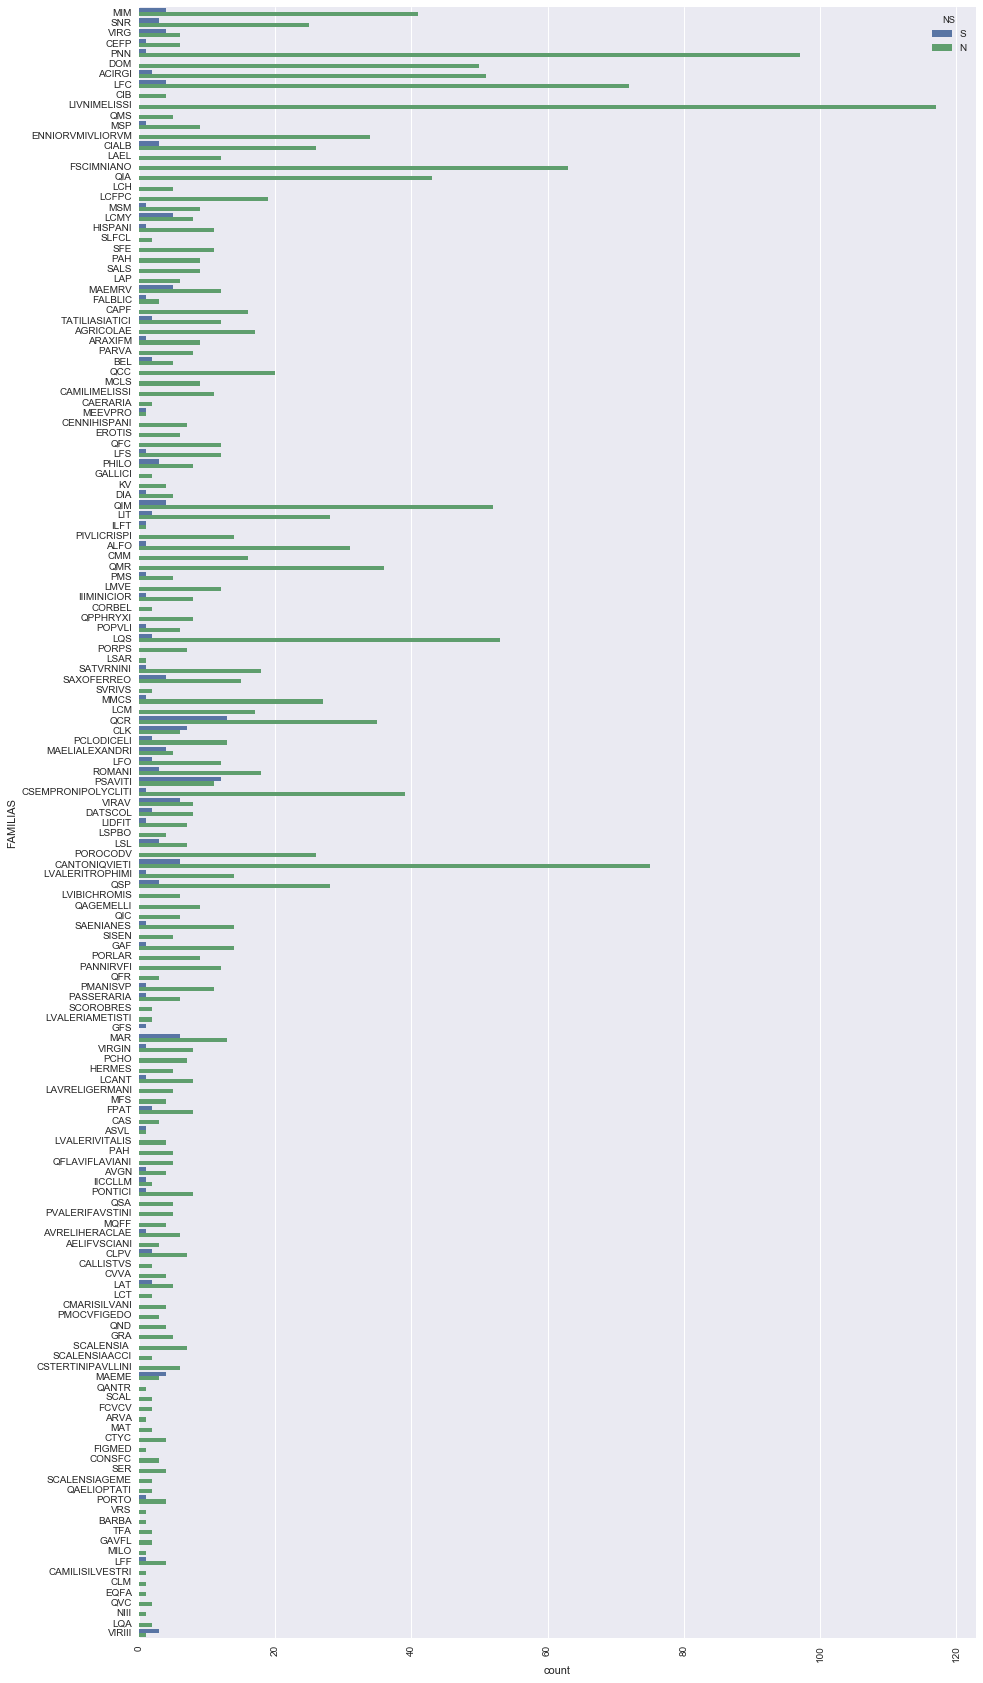

In [228]:
fig = plt.figure(figsize=(15,30))
sns.countplot(y = 'FAMILIAS', data = data_mil, hue = 'NS')
plt.xticks(rotation = 90)